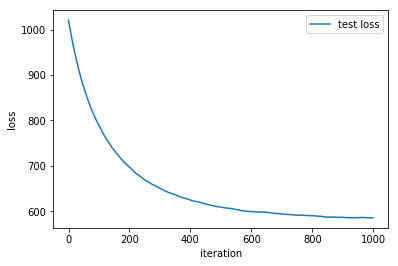

In [5]:
import numpy as np
from numpy import *
import pickle
import random
import matplotlib.pyplot as plt
def getDate(trainFilePath,testFilePath):
    fileTrain = open(trainFilePath, "r")
    fileTest = open(testFilePath,'r')
    train = np.loadtxt(fileTrain)
    test = np.loadtxt(fileTest)
    min1 = min(train[:, 0])
    max1 = max(train[:, 0])
    row = int(max1 - min1 + 1)
    col = 1682
    trainMat = np.zeros(row * col).reshape(row, col)
    min2 = min(test[:, 0])
    max2 = max(test[:, 0])
    row = int(max2 - min2 + 1)

    testMat = np.zeros(row * col).reshape(row, col)
    for i in range(train.shape[0]):
        r = int(train[i][0] - min1)
        c = int(train[i][1] - min1)
        trainMat[r][c] = train[i][2]
    for i in range(test.shape[0]):
        r = int(test[i][0] - min2)
        c = int(test[i][1] - min2)
        testMat[r][c] = test[i][2]
    return trainMat, testMat

def randomSelect(mat):
    u = random.randint(0,mat.shape[0]-1)
    i = random.randint(0,mat.shape[1]-1)
    return u,i
def loss(mat,P,Q,lamdaP,lamdaQ):
    error = 0
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            error += (mat[i][j]-P[i].dot(Q[:,j]))*(mat[i][j]-P[i].dot(Q[:,j]))
    rp = 0
    rq = 0
    for i in range(mat.shape[0]):
        rp += sum(P[i] ** 2)
    for j in range(mat.shape[1]):
        rq += sum(Q[:, j] ** 2)
    error += lamdaP*rp + lamdaQ*rq
    return error/mat.shape[0]


def gradient(mat,P,Q,u,i,lamdaP,lamdaQ):
    e = mat[u][i]-P[u].dot(Q[:,i])
    gpu=-e*Q[:,i]+lamdaP*P[u]
    gqi=-e*P[u]+lamdaQ*Q[:,i]
    return gpu,gqi

trainFilePath="K:\\courses\\machine learning\\ml-100k\\u1.base"
testFilePath="K:\\courses\\machine learning\\ml-100k\\u1.test"
trainMat,testMat=getDate(trainFilePath,testFilePath)
P = np.random.rand(trainMat.shape[0]*2).reshape(trainMat.shape[0],2)
Q = np.random.rand(2,trainMat.shape[1]).reshape(2,trainMat.shape[1])
trainLoss=[]
testLoss=[]
iteration =1000
learningRate=0.01
step=500
for j in range(iteration):
    error = loss(testMat,P,Q,0.001,0.001)
    for s in range(step):
        u,i=randomSelect(trainMat)
        gpu,gqi=gradient(trainMat,P,Q,u,i,0.001,0.001)
        P[u]=P[u]-learningRate*gpu
        Q[:,i]=Q[:,i]-learningRate*gqi
    testLoss.append(error)

plt.plot(range(iteration),testLoss, label='test loss')
#plt.plot(range(iteration),validateLoss, label='validtion loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()